In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt

Tamaño del set de entrenamiento: (60000, 28, 28)
Tamaño del set de prueba: (10000, 28, 28)


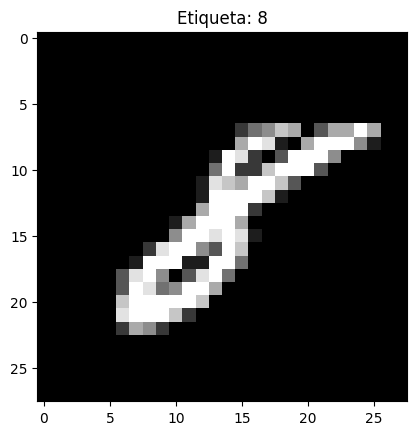

In [38]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Tamaño del set de entrenamiento:", x_train.shape)
print("Tamaño del set de prueba:", x_test.shape)

# Mostrar un ejemplo
plt.imshow(x_train[8759], cmap="gray")
plt.title(f"Etiqueta: {y_train[8759]}")
plt.show()

In [39]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [40]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28)),                  # capa de entrada
    tf.keras.layers.Flatten(),                       # aplana la imagen
    tf.keras.layers.Dense(128, activation='relu'),   # capa oculta
    tf.keras.layers.Dense(10, activation='softmax')  # salida
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9259 - loss: 0.2582 - val_accuracy: 0.9531 - val_loss: 0.1505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9653 - loss: 0.1169 - val_accuracy: 0.9715 - val_loss: 0.0918
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9759 - loss: 0.0798 - val_accuracy: 0.9716 - val_loss: 0.0886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9737 - val_loss: 0.0868
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9857 - loss: 0.0454 - val_accuracy: 0.9760 - val_loss: 0.0806


In [42]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nPrecisión en datos de prueba:", test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.9760 - loss: 0.0806

Precisión en datos de prueba: 0.9760000109672546


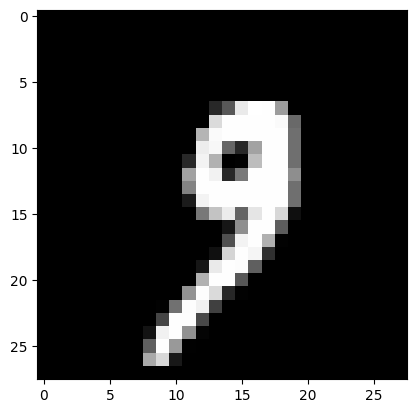

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicción: 9


In [43]:
import numpy as np

# Elegimos una imagen de prueba
img = x_test[1000]
plt.imshow(img, cmap="gray")
plt.show()

# Predicción
img = np.expand_dims(img, axis=0)  # expandir dimensiones para que sea compatible
prediction = model.predict(img)
print("Predicción:", prediction.argmax())